# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [24]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [6]:
# Your code here.
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 56, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})
student_data.index += 1
student_data

,Age,Tardies
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,56,0
10,30,3


Draw a dispersion diagram (scatter plot) for the data.

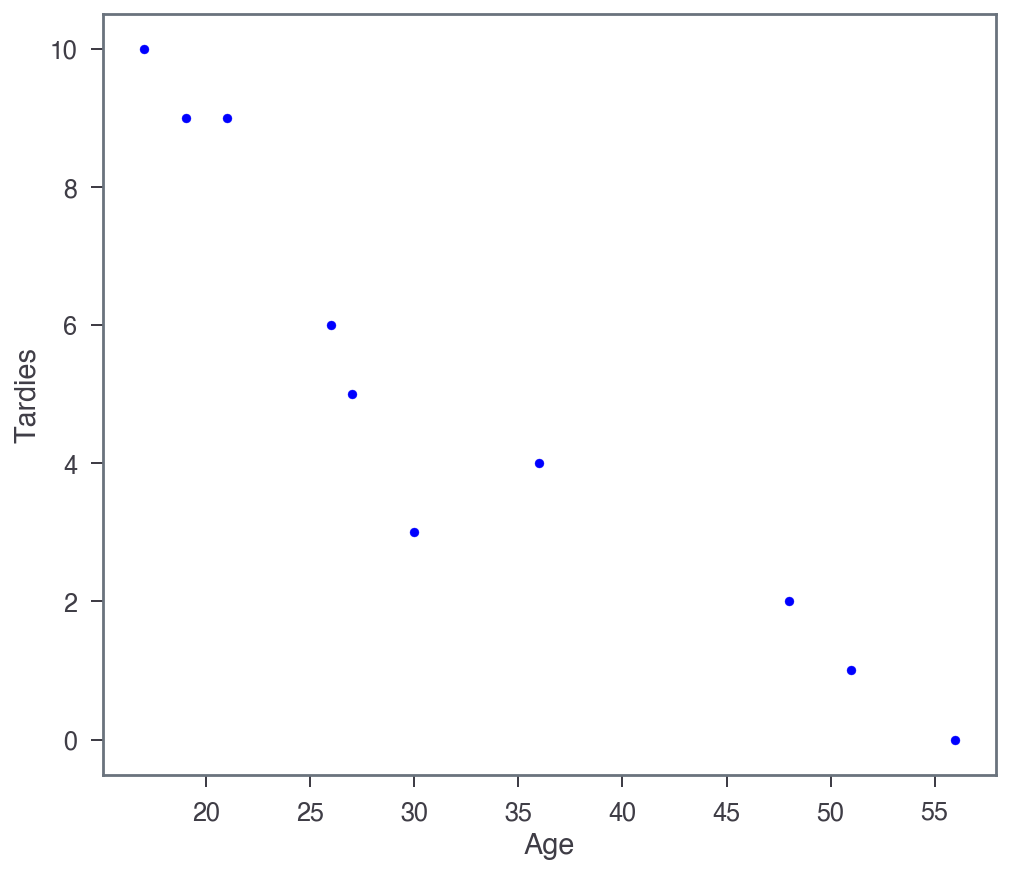

In [27]:
# Your code here.
student_data.plot(kind = 'scatter', x = 'Age', y = 'Tardies', color = 'blue');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
'''
Yes, I do see a trend here.
I see that the younger the students are, they do, in fact, tend to arrive
later to class, as opposed to the older students, who tend to not arrive late at all, like the
student whose age is 55, for instance.
'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [22]:
#correlation:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.937492
Tardies,-0.937492,1.000000


In [23]:
#covariance:
student_data.cov()

,Age,Tardies
Age,197.433333,-46.655556
Tardies,-46.655556,12.544444


In [ ]:
'''
Covariance is a measure of how changes in one variable are associated with changes in a 
second variable. Specifically, covariance measures the degree to which two variables are 
linearly associated. However, it is also often used informally as a general measure of 
how monotonically related two variables are.
A positive value of Covariance means that two random variables tend to vary in the same direction, 
a negative value means that they vary in opposite directions, and a 0 means that they don't 
vary together.

Correlation is a statistical measure that indicates the extent to which two or more variables 
fluctuate together. A positive correlation indicates the extent to which those variables 
increase or decrease in parallel; a negative correlation indicates the extent to which one 
variable increases as the other decreases.

Given all that, we can see that Age and Tardies have a very high negative correlation, and negative
covariance as well. That means that they grow/influence each other and vary in opposite directions.
"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [46]:
# Your response here.
# From class:
    #slope, intercept, r_value, _, std_err = stats.linregress(X, Y)
    #Y_pred = intercept + slope * X

# So I just replaced the values with the data we have, and built this model
slope, intercept, r_value, _, std_err = stats.linregress(student_data['Age'], student_data['Tardies'])

# Function to predict how late a person might be, based on their age
def prediction(age):
    return intercept + slope * age

# Testing on my age, out of curiosity, lol.
prediction(23)

7.286735325566998

Plot your regression model on your scatter plot.

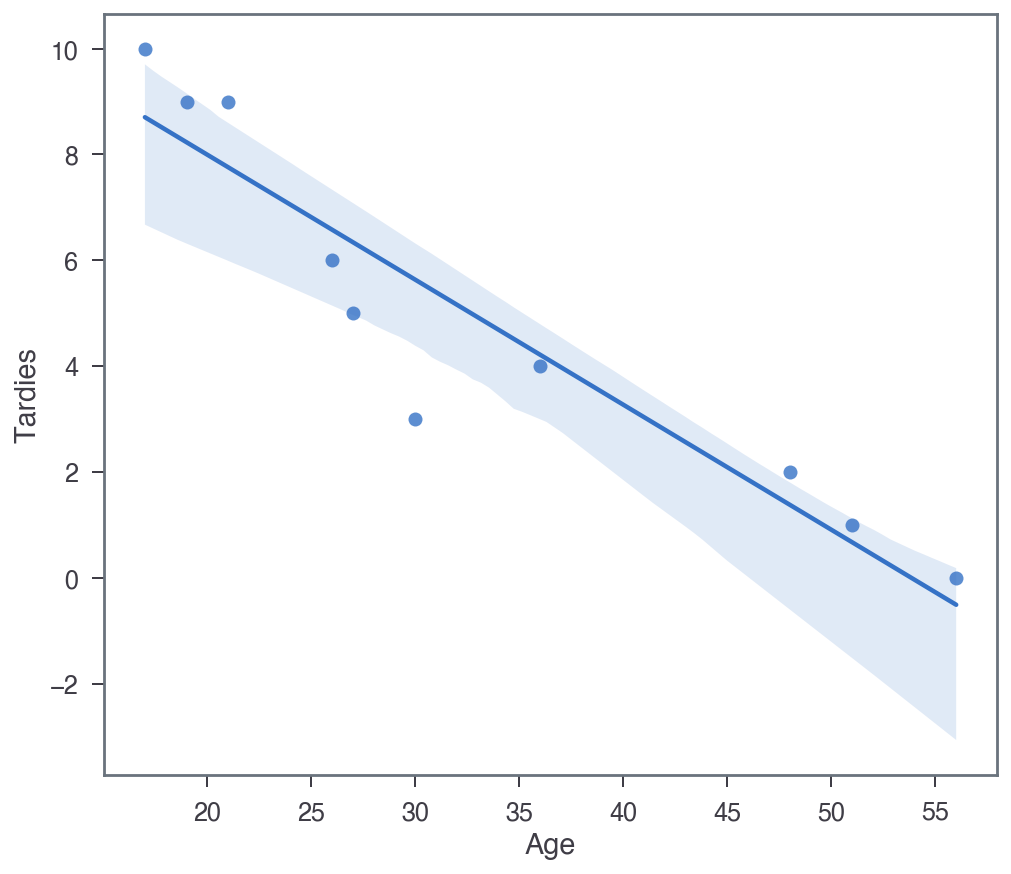

In [60]:
# This plot seems to already do a scatter by itself and then fit the reg model. So smart :3
# Starting to become a seaborn fan
sns.regplot(x = 'Age', y = 'Tardies', data = student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
'''
From this plot we can see confirm again what we already assumed before, which is: there is a high
correlation of younger students being more late to class and older students not.
However, age 30 seems to be an outlier maybe? Since it is away from the regression line.
Another problem is that the sample is very small. Maybe with a bigger one results might change
quite a lot.
'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [64]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/Users/mattymrc/Desktop/Ironhack/Datasets/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [65]:
# Your response here. 
vehicles_chosen = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 
                            'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

vehicles_chosen

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
